##### Define the state

In [2]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph import add_messages


class State(TypedDict):
    messages:Annotated[list,add_messages]

##### IMport the ENV Variables and LLM

In [5]:
import os
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

llm = ChatGroq(model="llama-3.1-8b-instant")
llm


ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001B5CFDF0B90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001B5CFFF9C70>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

#### Define the Node

In [6]:
def superBot(state:State):
    print("Super Bot Node Has Been Called...")
    return {"messages":[llm.invoke(state["messages"])]}

#### Graph Construction and Memory Checker

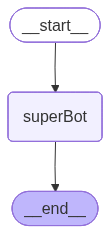

In [11]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

##Define the Graph
graph = StateGraph(State)

#Add the nodes
graph.add_node("superBot",superBot)

##Add Edges
graph.add_edge(START,"superBot")
graph.add_edge("superBot",END)

##Compile the Graph
graph_biulder = graph.compile(checkpointer=memory)

display(Image(graph_biulder.get_graph().draw_mermaid_png()))

#### Invoke the Graph

In [15]:
config = {"configurable":{"thread_id":"1"}}
graph_biulder.invoke(
    {
        "messages":"Hello My name is Husen and I like FootBall and i worked as a accountant"
    },
    config=config
)

Super Bot Node Has Been Called...


{'messages': [HumanMessage(content='What is Data Science', additional_kwargs={}, response_metadata={}, id='f61289d4-9c85-4624-a61e-b4f90c8000c5'),
  AIMessage(content='Data Science is a multidisciplinary field that combines aspects of computer science, statistics, and domain-specific knowledge to extract insights and knowledge from data. It involves the use of various techniques, tools, and methodologies to analyze, model, and interpret complex data sets, often to inform business decisions or drive strategic actions.\n\nThe primary goals of Data Science include:\n\n1. **Insight generation**: Identifying patterns, trends, and correlations within data to gain a deeper understanding of the problem or opportunity.\n2. **Prediction and forecasting**: Developing models to predict future outcomes or behaviors based on historical data.\n3. **Decision-making**: Providing recommendations or guidance to stakeholders based on the insights and predictions generated.\n4. **Automation**: Using algori

##### Change thread ID

#### Using Values Stream Mode

In [20]:
from pprint import pprint
config2 = {"configurable":{"thread_id":"2"}}

for chunk in graph_biulder.stream({"messages":"Hello My name is Husen and I like FootBall and i worked as a accountant"},
                                  config=config2,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='670d5220-2098-4a64-afc3-c85000a185d9'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='6f738fdc-9206-40d0-8688-e9fc5ee8dce4'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='b1f1988b-a7e6-4866-8440-42221045ba5d')]}
Super Bot Node Has Been Called...
{'messages': [HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='670d5220-2098-4a64-afc3-c85000a185d9'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='6f738fdc-9206-40d0-8688-e9fc5ee8dce4'), HumanMessage(cont

#### using stream mode ="values"

In [21]:
from pprint import pprint
config2 = {"configurable":{"thread_id":"2"}}

for chunk in graph_biulder.stream({"messages":"Hello My name is Husen and I like FootBall and i worked as a accountant"},
                                  config=config2,stream_mode="updates"):
    print(chunk)

Super Bot Node Has Been Called...
{'superBot': {'messages': [AIMessage(content="It seems like we're stuck in a loop. Don't worry, let's start fresh. \n\nTo break the cycle, I'll ask a question: What's your favorite football team or league, Husen?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 176, 'total_tokens': 220, 'completion_time': 0.072311064, 'completion_tokens_details': None, 'prompt_time': 0.011648765, 'prompt_tokens_details': None, 'queue_time': 0.051190754, 'total_time': 0.083959829}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b163a-898c-77c0-a77c-3c9eb3660888-0', usage_metadata={'input_tokens': 176, 'output_tokens': 44, 'total_tokens': 220})]}}


### Ask Question

In [23]:
from pprint import pprint
config2 = {"configurable":{"thread_id":"2"}}

for chunk in graph_biulder.stream({"messages":"who I'm I"},
                                  config=config2,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='670d5220-2098-4a64-afc3-c85000a185d9'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='6f738fdc-9206-40d0-8688-e9fc5ee8dce4'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='b1f1988b-a7e6-4866-8440-42221045ba5d'), AIMessage(content="Hello Husen. It seems like we're having a repetitive conversation. Nice to meet you. Football is a fantastic sport, is there a particular team or league you follow? And how did you find working as an accountant, was it a challenging yet rewarding career?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 96, 'total_tokens': 150, 'completion_time': 0.134162003, 'c

## 95-   astream() Method


In [24]:
config3 = {"configurable":{"thread_id":"2"}}

async for event in graph_biulder.astream_events(
    {"messages":"My Name is Husen and I belongs to India karnataka and i play FootBall"},
    config=config3,
    version="v2"
):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'My Name is Husen and I belongs to India karnataka and i play FootBall'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019b1646-05c7-7102-92f1-301cb5d38a8d', 'metadata': {'thread_id': '2'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='670d5220-2098-4a64-afc3-c85000a185d9'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='6f738fdc-9206-40d0-8688-e9fc5ee8dce4'), HumanMessage(content='Hello My name is Husen and I like FootBall and i worked as a accountant', additional_kwargs={}, response_metadata={}, id='b1f1988b-a7e6-4866-8440-42221045ba5d'), AIMessage(content="Hello Husen. It seems like we're having a repetitive conversation. Nice to meet you. Football is a fan